In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import plt

from IPython.core.pylabtools import figsize
figsize(16, 14)

In [2]:
flights = pd.read_csv('formatted_flights.csv')
flights.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [3]:
# Iterate through the five airlines
for airline in flights['name'].unique():
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density');

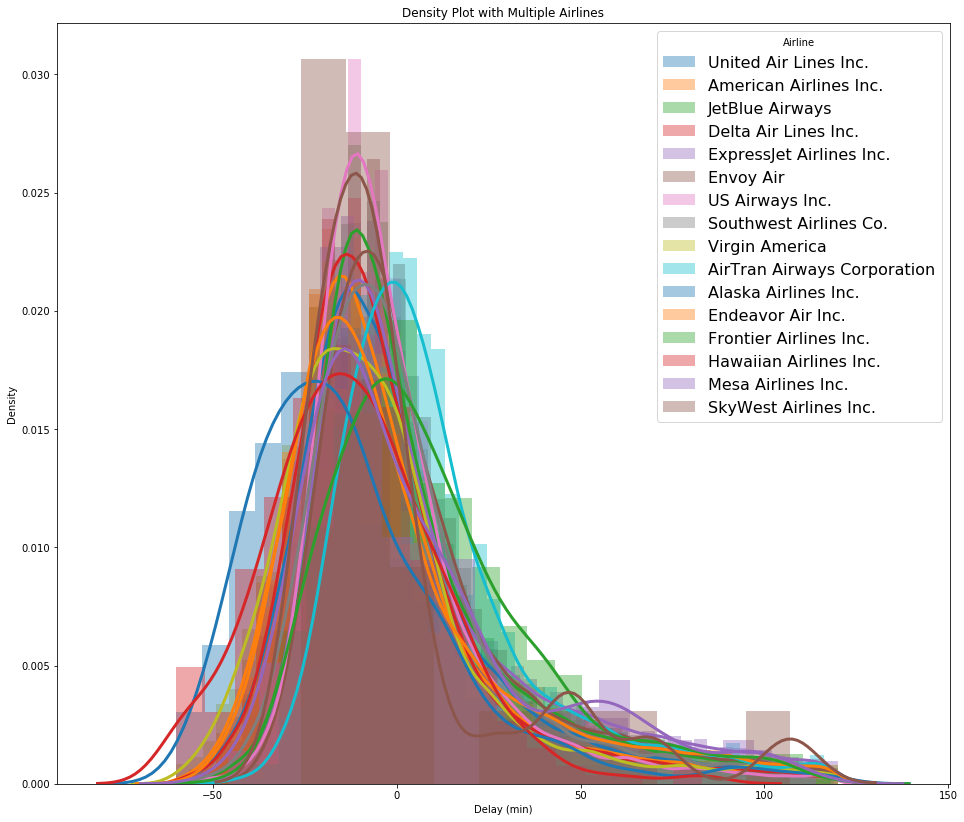

In [4]:
plt.show()

In [5]:
# Eye-balling nice distribution that goes farther to the left

delays = flights[flights['name'] == 'Alaska Airlines Inc.']['arr_delay']

In [6]:
delays.shape

(689,)

In [7]:
sample_means = np.vectorize(lambda sample_size: delays.sample(sample_size, replace=True).mean())

In [8]:
# 1. Sample distribution is less spread than population distribution

sns.distplot(delays, hist = True, kde = True,
                 kde_kws = {'linewidth': 3}, label='population')
sns.distplot(sample_means([10] * 1000), hist = True, kde = True,
             kde_kws = {'linewidth': 3}, label='sample of size 10')
plt.legend(prop={'size': 16})
plt.title('Population and sample distributions')
plt.xlabel('Delay (min)')
plt.ylabel('Density');

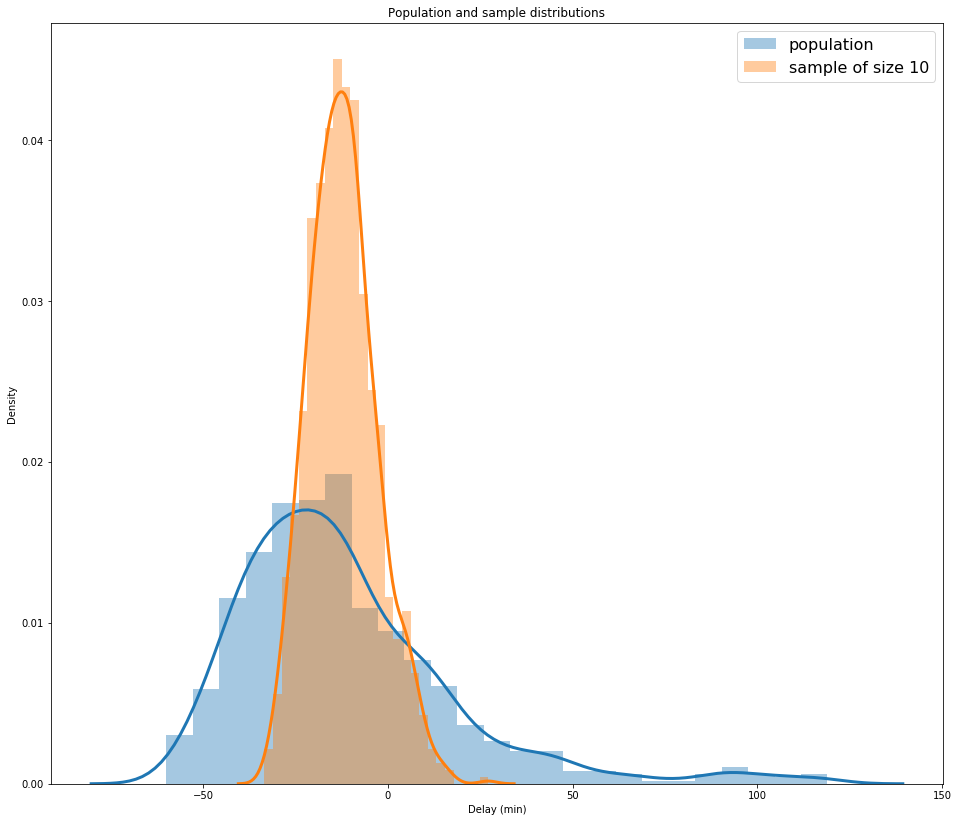

In [9]:
plt.show()

In [10]:
# 2. Greater sample size => more normal distribution

for sample_size in np.logspace(1, 4, 7):
    sns.distplot(sample_means([100] * int(sample_size)), hist=False, kde = True,
                 kde_kws = {'linewidth': 3}, label=int(sample_size))
plt.legend(prop={'size': 16}, title = 'Sample size')
plt.title('Distributions for different sample sizes')
plt.xlabel('Delay (min)')
plt.ylabel('Density');

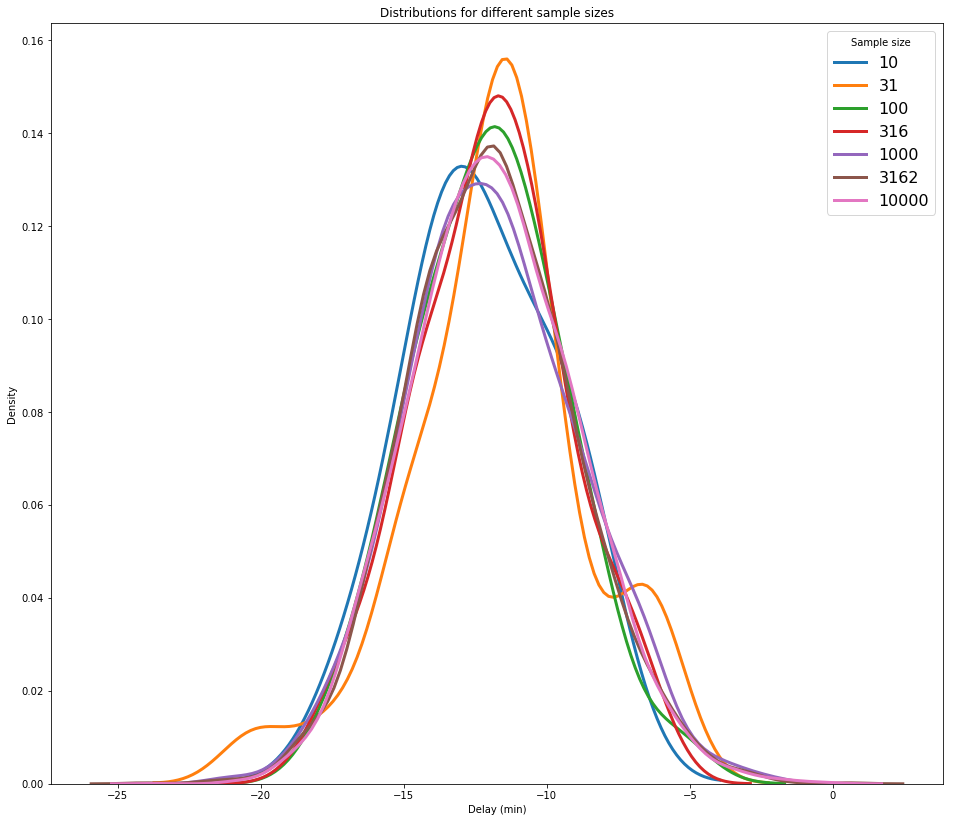

In [11]:
plt.show()

In [12]:
# 3. mean = $\mu$, std dev = $\sigma / \sqrt{n}$

samples = sample_means([[10, 25, 100, 500]] * 1000)

In [13]:
print(f"mean: {delays.mean()}, mu: {samples.mean(0)}")
print(f"std dev: {delays.std()}, sigma * sqrt(n): {samples.std(0) * np.sqrt([10, 25, 100, 500])}")

mean: -11.878084179970973, mu: [-12.1501   -11.72388  -11.92878  -11.810064]
std dev: 29.566533147645323, sigma * sqrt(n): [ 30.25853598  29.27134407  28.5464963   29.33276076]


In [14]:
# 4. Bigger samples => less spread

for n_samples in np.logspace(0.5, 3, 7):
    sns.distplot(sample_means([int(n_samples)] * 1000), hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label=int(n_samples))
plt.legend(prop={'size': 16}, title = 'Number of samples')
plt.title('Distributions for different number of samples')
plt.xlabel('Delay (min)')
plt.ylabel('Density');

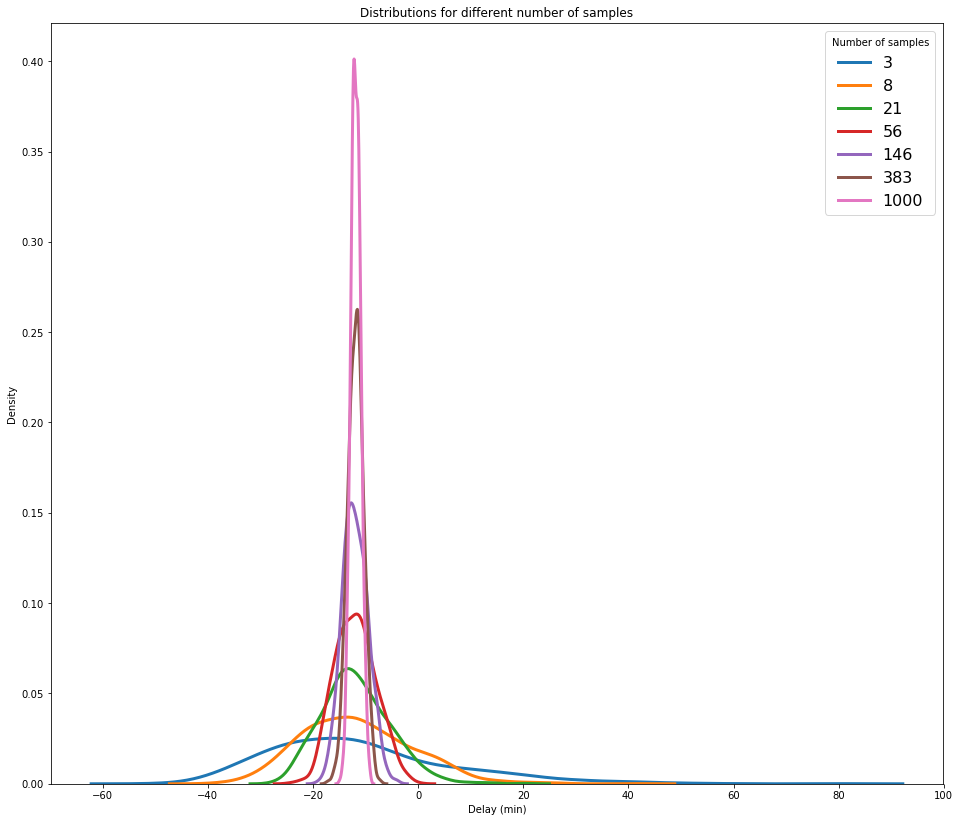

In [15]:
plt.show()